In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [5]:
df = pd.read_csv("C:\\Users\\hoi\\Desktop\\SAT revw\\coursera dataset.csv")

# Preview dataset
df.head()


,course_title,enrollment ID,platform,instructor_profile,reviews count,success score,category,rating,difficulty level,students enrolled,price_usd
0,Getting started with the Vertex AI Gemini 1.5 ...,C1,Coursera,University Professor,4059,8.157336,Data Science / AI,3.9,BEGINNER,228403.0,49
1,SPSS: Apply & Interpret Logistic Regression Mo...,C2,Coursera,Corporate Trainer,39703,8.764936,Other,3.8,BEGINNER,368698.0,29
2,Securing Compute Engine Applications and Resou...,C3,Coursera,Corporate Trainer,15022,8.346109,Other,3.5,INTERMEDIATE,283963.0,49
3,IntÃƒÆ’Ã†â€™Ãƒâ€šÃ‚Â©grer des applications dan...,C4,Coursera,Industry Expert,11324,8.534452,Design,4.4,BEGINNER,212935.0,79
4,Overcoming Challenges in Self and Society,C5,Coursera,Corporate Trainer,6229,8.580771,Other,4.5,BEGINNER,291664.0,0


In [6]:
# Dataset shape
df.shape

# Column names & data types
df.info()

# Statistical summary
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   course_title        5000 non-null   object 
 1   enrollment ID       5000 non-null   object 
 2   platform            5000 non-null   object 
 3   instructor_profile  5000 non-null   object 
 4   reviews count       5000 non-null   int64  
 5   success score       5000 non-null   float64
 6   category            5000 non-null   object 
 7   rating              5000 non-null   float64
 8   difficulty level    5000 non-null   object 
 9   students enrolled   5000 non-null   float64
 10  price_usd           5000 non-null   int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 429.8+ KB


,course_title,enrollment ID,platform,instructor_profile,reviews count,success score,category,rating,difficulty level,students enrolled,price_usd
count,5000,5000,5000,5000,5000.000000,5000.000000,5000,5000.000000,5000,5000.000000,5000.00000
unique,4993,5000,1,4,NaN,NaN,17,NaN,3,NaN,NaN
top,Security Operations,C5000,Coursera,Unknown,NaN,NaN,Other,NaN,BEGINNER,NaN,NaN
freq,2,1,5000,3500,NaN,NaN,1804,NaN,3171,NaN,NaN
mean,NaN,NaN,NaN,NaN,10004.594600,8.578526,NaN,4.453148,NaN,267069.158400,7.65140
std,NaN,NaN,NaN,NaN,12879.079104,0.247664,NaN,0.305456,NaN,78933.329798,17.83245
min,NaN,NaN,NaN,NaN,10.000000,6.412235,NaN,3.083333,NaN,1022.000000,0.00000
25%,NaN,NaN,NaN,NaN,2724.750000,8.605155,NaN,4.500000,NaN,270230.500000,0.00000
50%,NaN,NaN,NaN,NaN,5148.000000,8.605155,NaN,4.517057,NaN,270230.500000,0.00000
75%,NaN,NaN,NaN,NaN,8470.000000,8.605155,NaN,4.600000,NaN,270230.500000,0.00000


In [4]:
df.isnull().sum()


course_title          0
enrollment ID         0
platform              0
instructor_profile    0
reviews count         0
success score         0
category              0
rating                0
difficulty level      0
students enrolled     0
price_usd             0
dtype: int64

In [5]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [6]:
df = df.drop_duplicates()


In [8]:
df.columns


Index(['course_title', 'enrollment ID', 'platform', 'instructor_profile',
       'reviews count', 'success score', 'category', 'rating',
       'difficulty level', 'students enrolled', 'price_usd'],
      dtype='object')

In [9]:
df['price_usd'] = pd.to_numeric(df['price_usd'], errors='coerce')
df['students enrolled'] = pd.to_numeric(df['students enrolled'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

df[['price_usd', 'students enrolled', 'rating']] = df[
    ['price_usd', 'students enrolled', 'rating']
].fillna(df[['price_usd', 'students enrolled', 'rating']].median())


In [10]:
df = df.rename(columns={
    'students enrolled': 'enrollment',
    'difficulty level': 'difficulty',
    'reviews count': 'reviews',
    'price_usd': 'price',
    'instructor_profile': 'instructor'
})


In [11]:
df[['rating', 'enrollment', 'price']].skew()


rating       -1.378967
enrollment   -0.471869
price         2.402294
dtype: float64

In [12]:
df['price_log'] = np.log1p(df['price'])


In [13]:
df['price_log'].skew()


np.float64(1.7055002569996238)

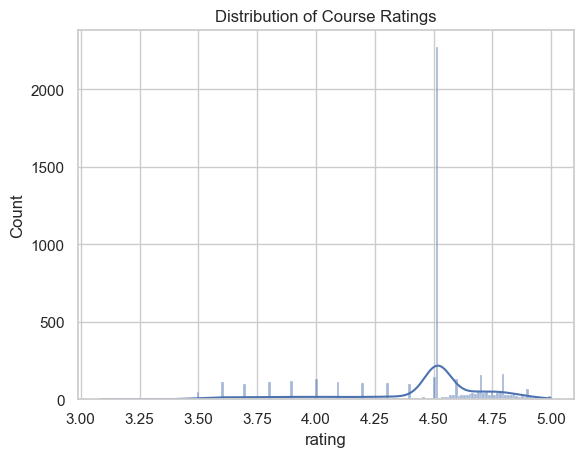

In [14]:
sns.histplot(df['rating'], kde=True)
plt.title("Distribution of Course Ratings")
plt.show()


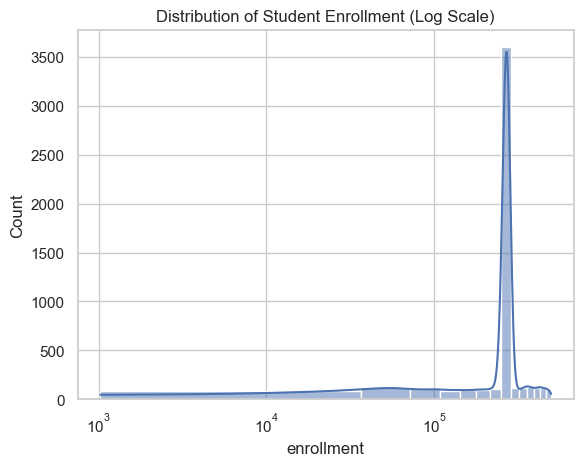

In [15]:
sns.histplot(df['enrollment'], kde=True)
plt.xscale('log')
plt.title("Distribution of Student Enrollment (Log Scale)")
plt.show()


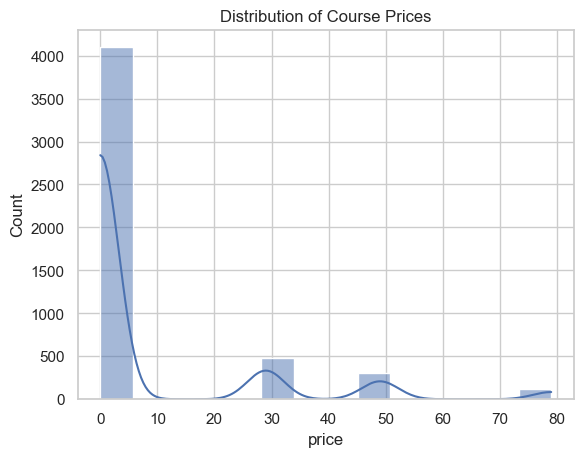

In [16]:
sns.histplot(df['price'], kde=True)
plt.title("Distribution of Course Prices")
plt.show()


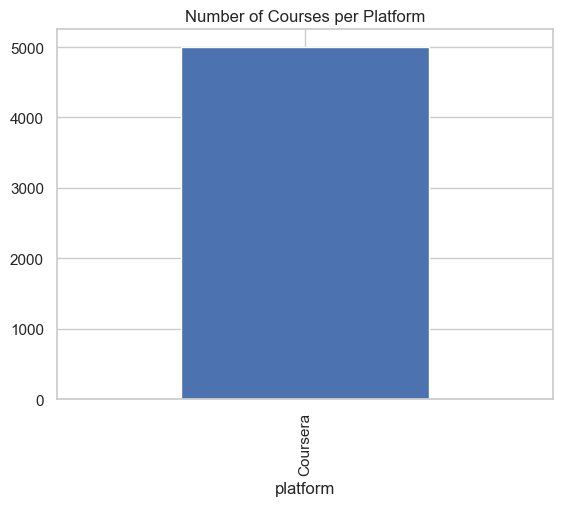

In [17]:
df['platform'].value_counts().plot(kind='bar')
plt.title("Number of Courses per Platform")
plt.show()


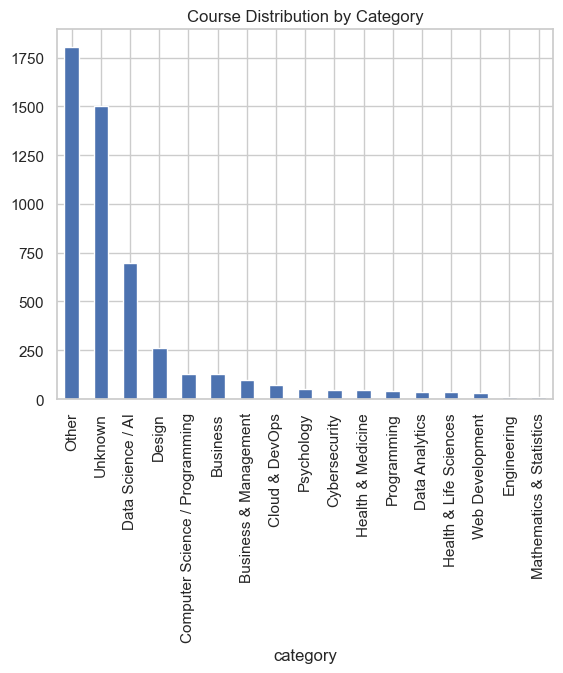

In [18]:
df['category'].value_counts().plot(kind='bar')
plt.title("Course Distribution by Category")
plt.show()


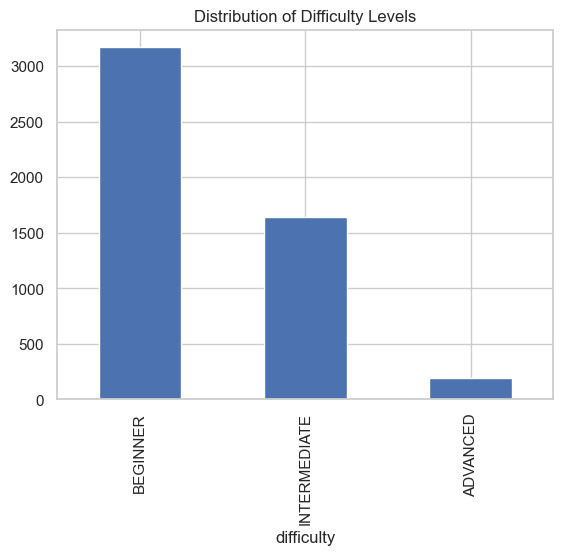

In [19]:
df['difficulty'].value_counts().plot(kind='bar')
plt.title("Distribution of Difficulty Levels")
plt.show()


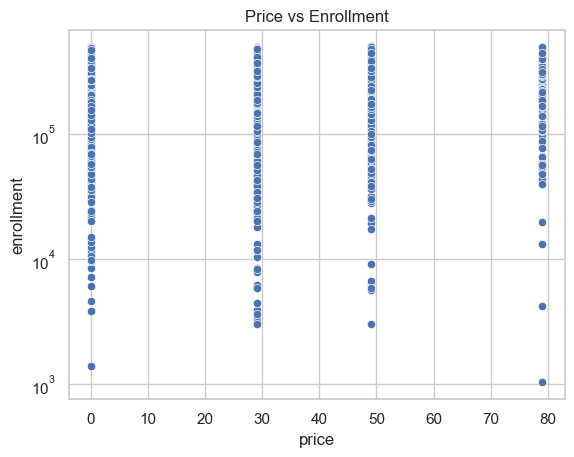

In [20]:
sns.scatterplot(x='price', y='enrollment', data=df)
plt.yscale('log')
plt.title("Price vs Enrollment")
plt.show()


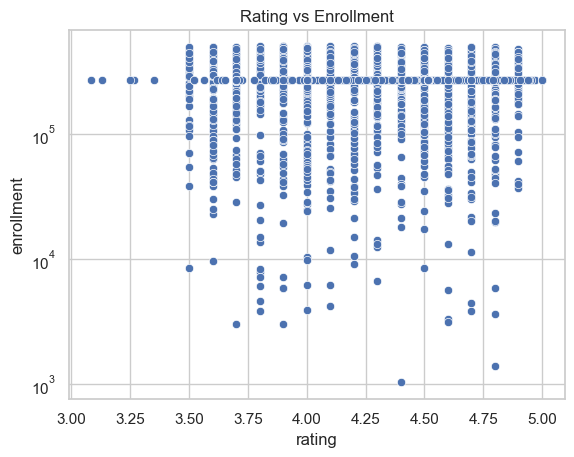

In [21]:
sns.scatterplot(x='rating', y='enrollment', data=df)
plt.yscale('log')
plt.title("Rating vs Enrollment")
plt.show()


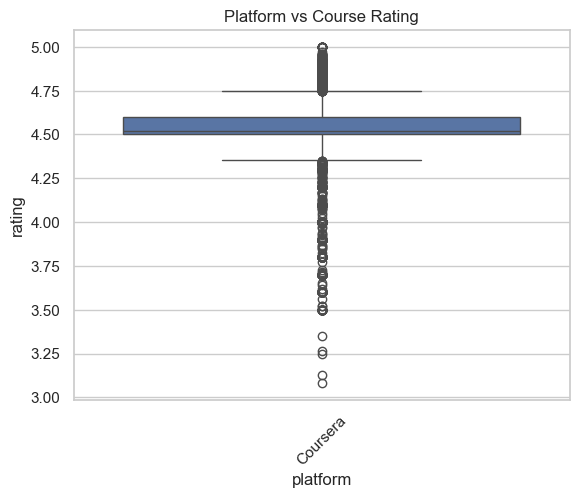

In [22]:
sns.boxplot(x='platform', y='rating', data=df)
plt.xticks(rotation=45)
plt.title("Platform vs Course Rating")
plt.show()


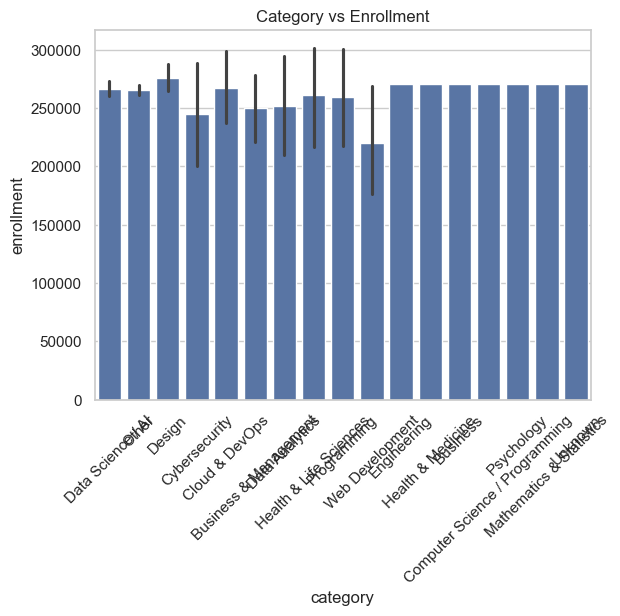

In [23]:
sns.barplot(x='category', y='enrollment', data=df)
plt.xticks(rotation=45)
plt.title("Category vs Enrollment")
plt.show()


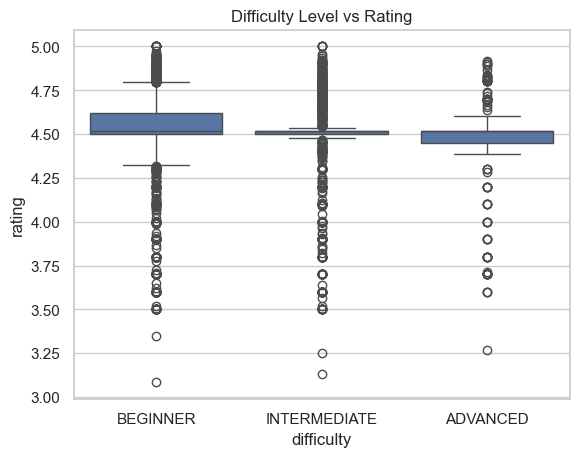

In [24]:
sns.boxplot(x='difficulty', y='rating', data=df)
plt.title("Difficulty Level vs Rating")
plt.show()


In [27]:
list(df.columns)


['course_title',
 'enrollment ID',
 'platform',
 'instructor',
 'reviews',
 'success score',
 'category',
 'rating',
 'difficulty',
 'enrollment',
 'price',
 'price_log']

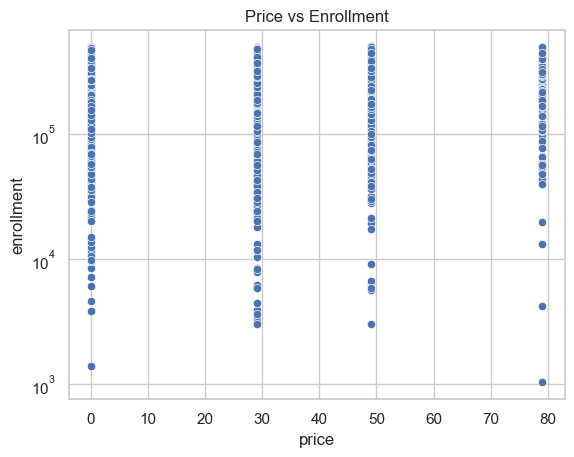

In [28]:
sns.scatterplot(x='price', y='enrollment', data=df)
plt.yscale('log')
plt.title('Price vs Enrollment')
plt.show()


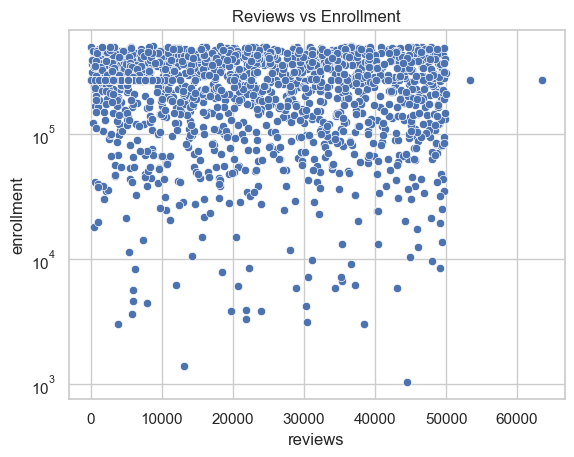

In [29]:
sns.scatterplot(x='reviews', y='enrollment', data=df)
plt.yscale('log')
plt.title('Reviews vs Enrollment')
plt.show()


In [31]:
df['instructor_course_count'] = (
    df['instructor']
    .map(df['instructor'].value_counts())
)


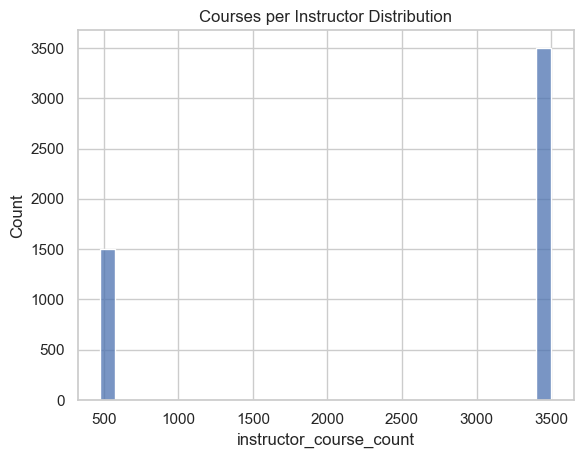

In [32]:
sns.histplot(df['instructor_course_count'], bins=30)
plt.title('Courses per Instructor Distribution')
plt.show()


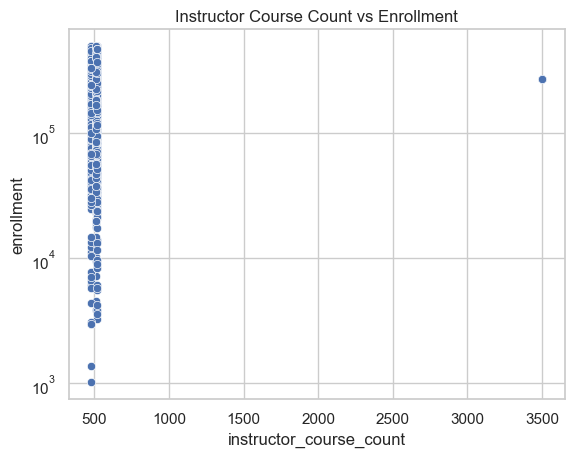

In [33]:
sns.scatterplot(
    x='instructor_course_count',
    y='enrollment',
    data=df
)
plt.yscale('log')
plt.title('Instructor Course Count vs Enrollment')
plt.show()


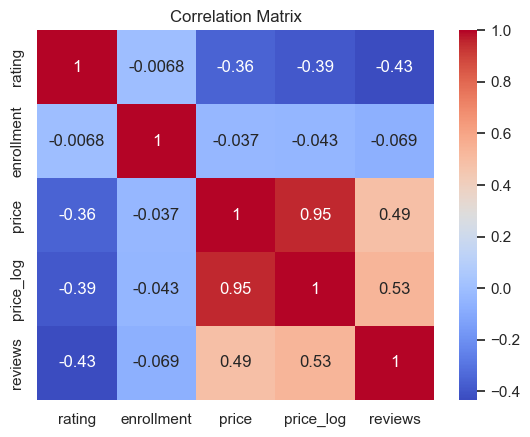

In [34]:
numeric_cols = [
    'rating',
    'enrollment',
    'price',
    'price_log',
    'reviews'
]

sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


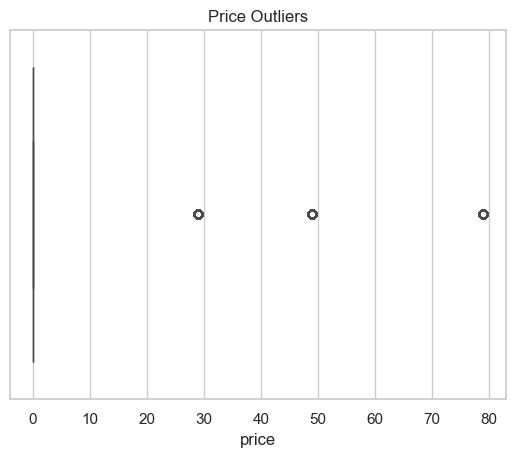

In [35]:
sns.boxplot(x=df['price'])
plt.title('Price Outliers')
plt.show()


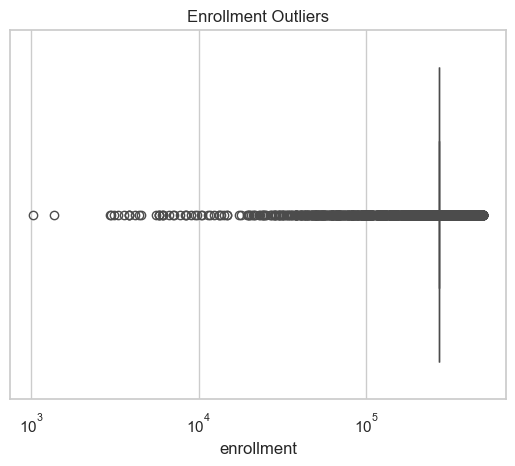

In [36]:
sns.boxplot(x=df['enrollment'])
plt.xscale('log')
plt.title('Enrollment Outliers')
plt.show()


In [37]:
df['instructor_course_count'] = (
    df['instructor']
    .map(df['instructor'].value_counts())
)


In [38]:
df['instructor_experience'] = pd.cut(
    df['instructor_course_count'],
    bins=[0, 1, 3, 10, df['instructor_course_count'].max()],
    labels=['New', 'Intermediate', 'Experienced', 'Expert']
)


In [40]:
df['price_log'] = np.log1p(df['price'])


In [41]:
df['price_log'].skew()


np.float64(1.7055002569996238)

In [42]:
df['price_bucket'] = pd.cut(
    df['price'],
    bins=[-1, 0, 50, 150, np.inf],
    labels=['Free', 'Low', 'Medium', 'High']
)


In [43]:
df['price_bucket'].value_counts()


price_bucket
Free      4097
Low        782
Medium     121
High         0
Name: count, dtype: int64

In [44]:
df['price_bucket'] = df['price_bucket'].cat.remove_categories(['High'])


In [48]:
price_bucket_str = df['price_bucket'].astype(str)


In [49]:
price_bucket_str = price_bucket_str.replace({
    'Low': 'Paid',
    'Medium': 'Paid'
})


In [50]:
df['price_bucket_merged'] = price_bucket_str.astype('category')


In [51]:
df['price_bucket_merged'].value_counts()


price_bucket_merged
Free    4097
Paid     903
Name: count, dtype: int64

In [52]:
df['instructor_course_count'] = (
    df['instructor']
    .map(df['instructor'].value_counts())
)


In [53]:
df['instructor_course_count'].describe()


count    5000.000000
mean     2600.163600
std      1374.689402
min       477.000000
25%       515.000000
50%      3500.000000
75%      3500.000000
max      3500.000000
Name: instructor_course_count, dtype: float64

In [54]:
df.drop(
    columns=[
        'instructor_course_count',
        'instructor_experience'
    ],
    inplace=True,
    errors='ignore'
)


In [55]:
df['review_enrollment_ratio'] = (
    df['reviews'] / df['enrollment']
).replace([np.inf, -np.inf], 0).fillna(0)


In [56]:
df['review_enrollment_ratio'].describe()


count    5000.000000
mean        0.098984
std         0.767174
min         0.000037
25%         0.009940
50%         0.019050
75%         0.032624
max        43.517613
Name: review_enrollment_ratio, dtype: float64

In [62]:
df['review_engagement_level_refined'] = (
    df['review_engagement_level']
    .astype(str)
    .replace({'High': 'High+', 'Very High': 'High+'})
    .astype('category')
)


In [63]:
df['review_engagement_level_refined'].value_counts()


review_engagement_level_refined
Medium    2372
High+     1378
Low       1250
Name: count, dtype: int64

In [64]:
df['rating_weighted_engagement'] = (
    df['review_enrollment_ratio'] * df['rating']
)


In [65]:
df['rating_weighted_engagement'] = (
    df['review_enrollment_ratio'] * df['rating']
)


In [66]:
df['rating_weighted_engagement'].describe()


count    5000.000000
mean        0.419758
std         3.313905
min         0.000137
25%         0.045990
50%         0.086052
75%         0.135943
max       191.477495
Name: rating_weighted_engagement, dtype: float64

In [67]:
df.groupby('review_engagement_level_refined')['rating_weighted_engagement'].describe()


C:\Users\hoi\AppData\Local\Temp\ipykernel_15436\585032665.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('review_engagement_level_refined')['rating_weighted_engagement'].describe()


,count,mean,std,min,25%,50%,75%,max
review_engagement_level_refined,,,,,,,,
High+,1378.0,1.370998,6.214067,0.070105,0.247513,0.439001,0.864921,191.477495
Low,1250.0,0.006522,0.009855,0.000137,0.000556,0.001893,0.007743,0.047041
Medium,2372.0,0.084908,0.005799,0.039239,0.086052,0.086052,0.086052,0.090830


In [68]:
df['category'].value_counts()


category
Other                             1804
Unknown                           1500
Data Science / AI                  695
Design                             263
Computer Science / Programming     128
Business                           126
Business & Management               96
Cloud & DevOps                      74
Psychology                          54
Cybersecurity                       46
Health & Medicine                   45
Programming                         40
Data Analytics                      38
Health & Life Sciences              37
Web Development                     31
Engineering                         13
Mathematics & Statistics            10
Name: count, dtype: int64

In [69]:
def consolidate_category(cat):
    if cat in ['Other', 'Unknown']:
        return 'Other/Unknown'
    elif cat in ['Data Science / AI', 'Data Analytics', 'Mathematics & Statistics']:
        return 'Data'
    elif cat in ['Computer Science / Programming', 'Programming', 'Web Development']:
        return 'Programming'
    elif cat in ['Business', 'Business & Management']:
        return 'Business'
    elif cat in ['Cloud & DevOps', 'Cybersecurity']:
        return 'IT & Security'
    elif cat in ['Health & Medicine', 'Health & Life Sciences']:
        return 'Health'
    else:
        return cat  # Design, Psychology, Engineering


In [70]:
df['category_grouped'] = df['category'].apply(consolidate_category)


In [71]:
df['category_grouped'].value_counts()


category_grouped
Other/Unknown    3304
Data              743
Design            263
Business          222
Programming       199
IT & Security     120
Health             82
Psychology         54
Engineering        13
Name: count, dtype: int64

In [72]:
pd.crosstab(
    df['category_grouped'],
    df['review_engagement_level_refined'],
    normalize='index'
)


review_engagement_level_refined,High+,Low,Medium
category_grouped,,,
Business,0.364865,0.265766,0.369369
Data,0.364738,0.169583,0.465680
Design,0.399240,0.163498,0.437262
Engineering,0.000000,0.538462,0.461538
Health,0.378049,0.378049,0.243902
IT & Security,0.883333,0.083333,0.033333
Other/Unknown,0.215496,0.276937,0.507567
Programming,0.361809,0.180905,0.457286
Psychology,0.000000,0.425926,0.574074


In [3]:
df.to_csv("coursera_processed_dataset.csv", index=False)


NameError: name 'df' is not defined